In [197]:
import pandas as ps 
import numpy as np
import matplotlib.pyplot as plt 
import sklearn as sk
from sklearn.model_selection import train_test_split

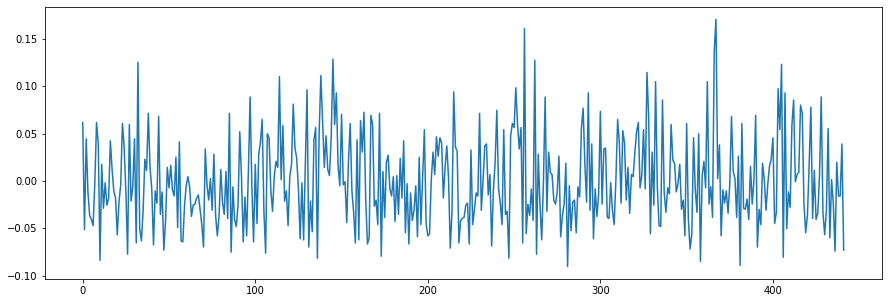

In [235]:
df = ps.read_csv("bmi.csv")
plt.figure(figsize=(15,5))
plt.plot(df["0"])

In [199]:
df["0"].describe()

count    4.420000e+02
mean    -8.015207e-16
std      4.761905e-02
min     -9.027530e-02
25%     -3.422907e-02
50%     -7.283766e-03
75%      3.124802e-02
max      1.705552e-01
Name: 0, dtype: float64

In [234]:
df.head()

,Unnamed: 0,0
0,0,0.061696
1,1,-0.051474
2,2,0.044451
3,3,-0.011595
4,4,-0.036385


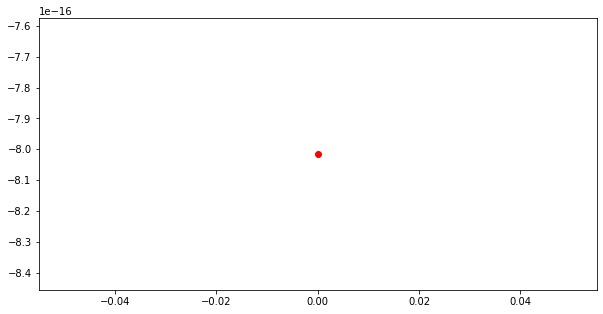

In [236]:
plt.figure(figsize=(10,5))
plt.plot(df["0"].mean(),"ro")

In [221]:
df["0"] = df["0"].astype(float)
mean = df["0"].mean()
y = np.array([np.float64(y) for y in df["0"]])

var_y = []
for i in y:
    var_y.append((i - mean)**2)#dige e nagereftam chun khodesh mishavad



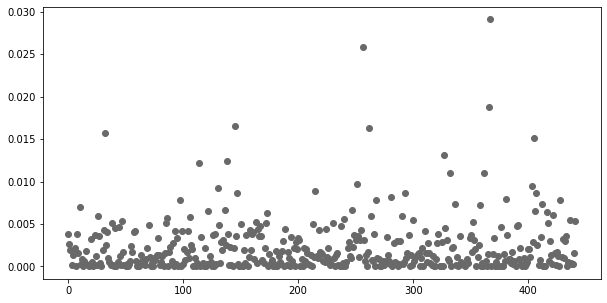

In [276]:
plt.figure(figsize=(10,5))
plt.scatter(df["Unnamed: 0"],var_y,c = "dimgrey",marker = "o")

In [277]:
X = np.array([x for x in df["Unnamed: 0"]])
X_train , X_test ,y_train , y_test = train_test_split(X,y, test_size=0.2, train_size=0.8, shuffle=True)

In [278]:
class Linear_Regression:
    def __init__(self):
        self.x = None
        self.y = None
        self.alpha0 = None
        self.alpha1 = None
        self.coeffients = []
        
    def fit(self,x,y):
        self.x = x
        self.y = y
        
        xbar = x.mean()
        ybar = y.mean()
        
        numerator = 0 
        denominator = 0
         
        for i in range(len(x)):#len(x) == len(y)
            numerator += (x[i]-xbar)*(y[i]-ybar)
            denominator += (x[i]-xbar)**2
            
        self.alpha1 = numerator / denominator
        self.alpha0 = ybar - (self.alpha1*xbar)
        
        self.coeffients = [self.alpha0, self.alpha1]
        return self
    
    def predict(self,x):
        yhat = []
        
        for i in range(len(x)):
            yhat.append((self.alpha1*x[i]) + self.alpha0)
        return yhat
    
    def mse(self,x,y):
        n = len(x)
        sse = 0 #sum square error 
        for i in range(n):
            sse += ((x[i] - y[i])**2)
        mse = sse / n 
        return mse 
            
            

In [279]:
lr = Linear_Regression()
lr.fit(X_train,y_train)
yhat = lr.predict(X_test)
lr.mse(y_test,yhat)

0.0026982473027560142

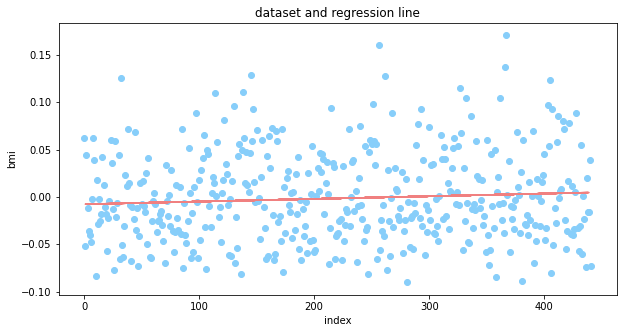

In [284]:
plt.figure(figsize=(10,5))
plt.scatter(df["Unnamed: 0"],df["0"], c = 'lightskyblue')
plt.ylabel("bmi")
plt.xlabel("index")
plt.title('dataset and regression line')
plt.plot(X_test,yhat,c = 'lightcoral')